In [48]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.1', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [10]:
# Create a quantum and a classical register (qiskit terra)
from qiskit import *
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
%matplotlib inline
circuit.draw()

q2_0: 
      
q2_1: 
      
c1: 2/

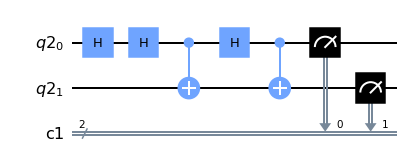

In [15]:
circuit.h(qr[0]) # create a Hadamart gate on the first qubit
circuit.cx(qr[0], qr[1]) # create a two qubit operation called controlled X gate (like an if/then/else)
circuit.measure(qr, cr) # Take the measurements from the quantum register and stored them in the classical register
circuit.draw(output='mpl')

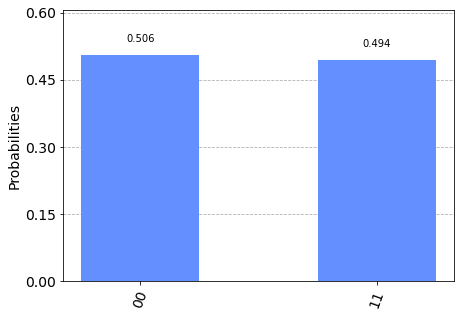

In [23]:
# Use Aer to simulate quantum locally
simulator = Aer.get_backend('qasm_simulator') # qasm is quantum assembly language
result = execute(circuit, backend = simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [41]:
# Use IBM to run quantum
from qiskit import IBMQ
IBMQ.save_account('<API token>')
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider.backends()

configrc.store_credentials:WARNING:2022-04-23 22:48:09,318: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-04-23 22:48:09,672: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [36]:
#qcomp = provider.get_backend('ibmq_armonk') # Armonk only has a single qubit
qcomp = provider.get_backend('ibmq_santiago')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


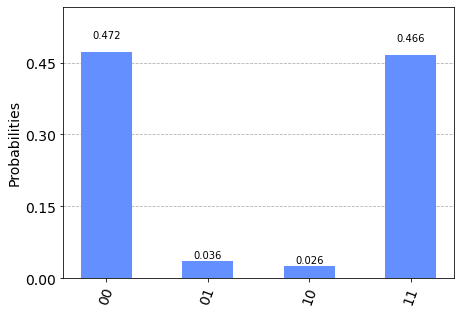

In [40]:
result = job.result()
plot_histogram(result.get_counts(circuit))

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


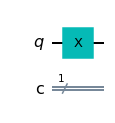

In [49]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
%matplotlib inline
circuit.draw(output='mpl')

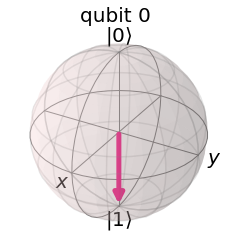

In [52]:
plot_bloch_multivector(statevector)

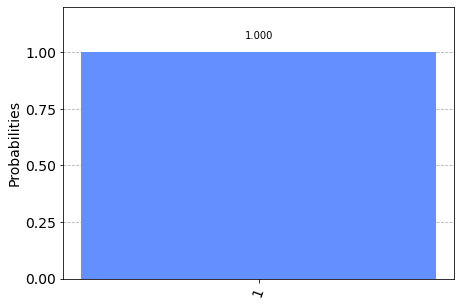

In [55]:
circuit.measure([0], [0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [60]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


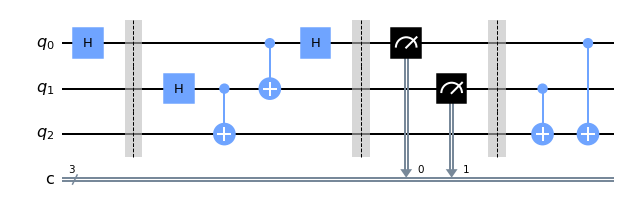

In [80]:
# create entaglement between q1 and q2
from qiskit import *
circuit = QuantumCircuit(3,3)
%matplotlib inline
circuit.draw(output='mpl')
circuit.x(0)
circuit.barrier()
circuit.h(1) # hadamart gate on q1
circuit.cx(1,2) # controlled xgate between q1 and q2
circuit.draw(output='mpl')
circuit.cx(0,1) # controlled xgate between q0 and q1
circuit.h(0) # hadamart gate on q0
circuit.draw(output='mpl')
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')
circuit.barrier()
circuit.cx(1,2) # controlled xgate between q1 and q2
circuit.cx(0,2) # controlled xgate between q0 and q2
circuit.draw(output='mpl')

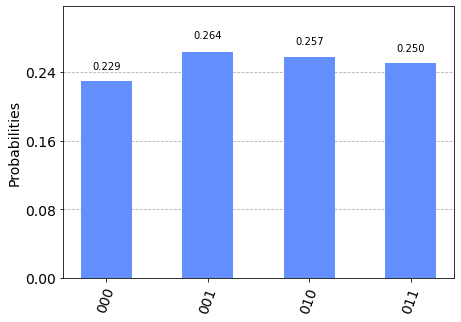

In [82]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

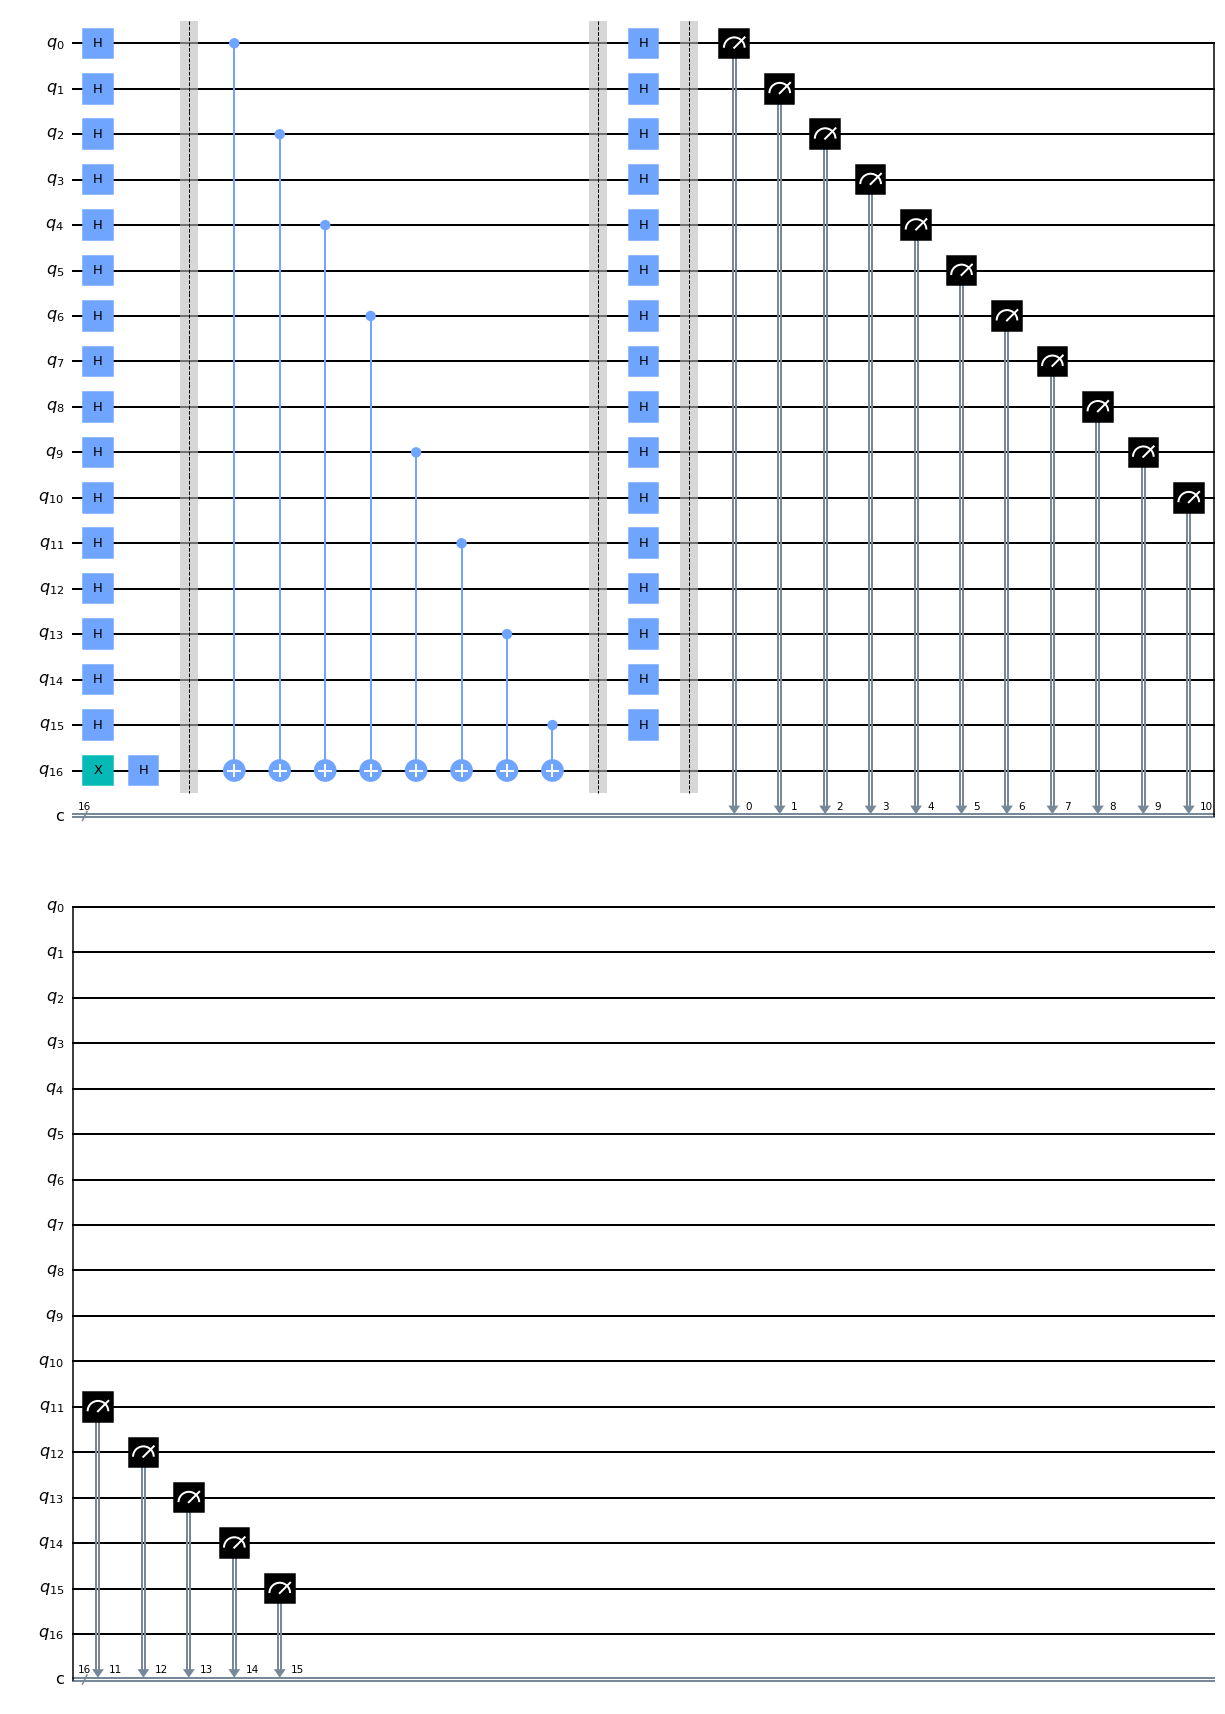

In [150]:
# Bernstein-Vazirani algorithm
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
secretnumber = '1010101001010101'

#circuit = QuantumCircuit(6+1, 6)
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5,6])
circuit.h(range(len(secretnumber)))
circuit.draw(output='mpl')

#circuit.x(6)
circuit.x(len(secretnumber))

#circuit.h(6)
circuit.h(len(secretnumber))

circuit.draw(output='mpl')
circuit.barrier()

#circuit.cx(0,6)
#circuit.cx(3,6)
#circuit.cx(5,6)
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))

circuit.draw(output='mpl')
circuit.barrier()

#circuit.h([0,1,2,3,4,5,6])
circuit.h(range(len(secretnumber)))

circuit.barrier()
#circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

circuit.draw(output='mpl')

In [151]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1010101001010101': 1}


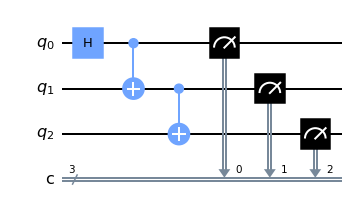

In [113]:
# Mitigating noise (using qiskit ignis)
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])
circuit.draw(output='mpl')

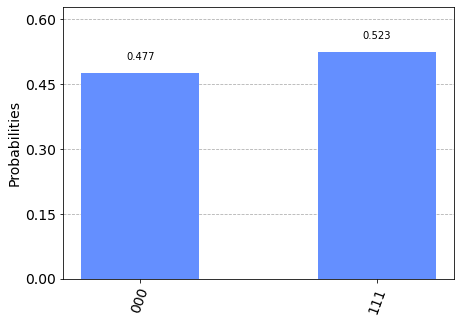

In [118]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots=1024).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [121]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()
#qcomp = provider.get_backend('ibmqx2'
qcomp = provider.get_backend('ibmq_manila')
job = execute(circuit, backend=qcomp, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

62655c3502bedf5c8b3dbbe9
Job Status: job has successfully run


In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [125]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measureerrormitigationcal')
cal_circuits[2].draw(output='mpl')
len(cal_circuits)

8

In [129]:
cal_job = execute(cal_circuits,
                 backend = qcomp,
                 shots = 1024,
                 optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

6265658a38bfaa04946585da
Job Status: job has successfully run


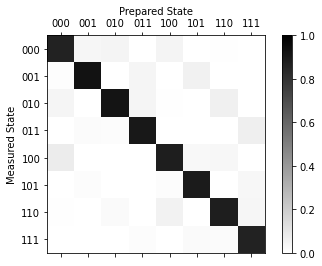

In [135]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(device_result)

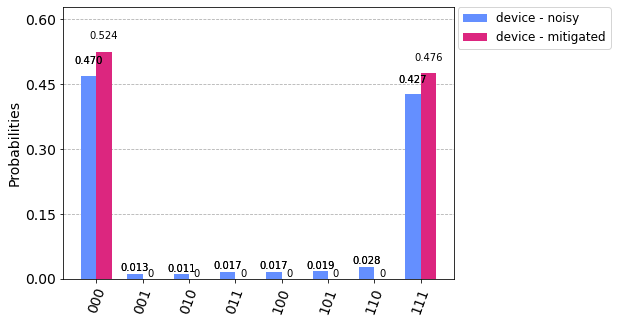

In [137]:
device_counts = device_result.get_counts(circuit)
mitigated_counts  = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device - noisy', 'device - mitigated'])

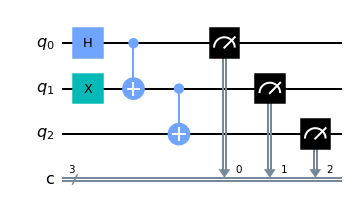

In [143]:
nqubits = 3
circuit2 = QuantumCircuit(nqubits, nqubits)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output='mpl')

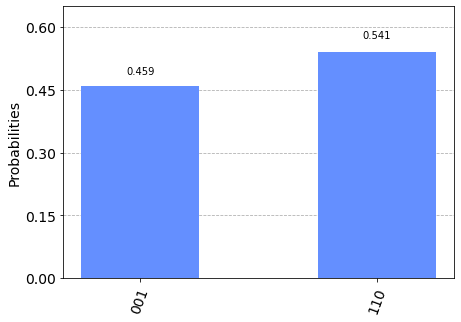

In [144]:
plot_histogram(execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2))

In [149]:
job2 = execute(circuit2, backend=qcomp, shots=1024)
print(job2.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job2)
device_counts_2 = job2.result().get_counts(circuit2)

62658df68b2315889b4f9435
Job Status: job has successfully run
